# 🐧 Penguin Species Clustering using K-Means (Unsupervised Learning)

1. Project Overview

In this project, we work with the Penguins dataset collected in Antarctica.
The dataset does not contain species labels, but researchers believe there are at least three penguin species in the data.

Objective

Use unsupervised learning (K-Means clustering) to:

Identify natural groups in the data

Help researchers understand possible penguin species clusters

# 2. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 3. Load and Explore the Dataset

In [6]:
penguins_df= pd.read_csv("/content/datalab_export_2026-01-01 16_30_25.csv")
penguins_df.head()

penguins_df.drop("index", axis=1, inplace=True)
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181,3750,MALE
1,39.5,17.4,186,3800,FEMALE
2,40.3,18.0,195,3250,FEMALE
3,36.7,19.3,193,3450,FEMALE
4,39.3,20.6,190,3650,MALE


In [7]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    int64  
 3   body_mass_g        332 non-null    int64  
 4   sex                332 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 13.1+ KB


# 4. Convert Categorical Variables into Dummy Variables

K-Means only works with numeric data.
The dataset contains a categorical column sex, so we convert it into dummy variables.

In [8]:
penguins_df = pd.get_dummies(penguins_df, dtype='int')
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181,3750,0,1
1,39.5,17.4,186,3800,1,0
2,40.3,18.0,195,3250,1,0
3,36.7,19.3,193,3450,1,0
4,39.3,20.6,190,3650,0,1


# 5. Feature Scaling (Standardization)

K-Means uses distance, so features must be on the same scale.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(penguins_df)

penguins_preprocessed = pd.DataFrame(
    data=X_scaled,
    columns=penguins_df.columns
)

penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


# 6. Finding the Optimal Number of Clusters (Elbow Method)

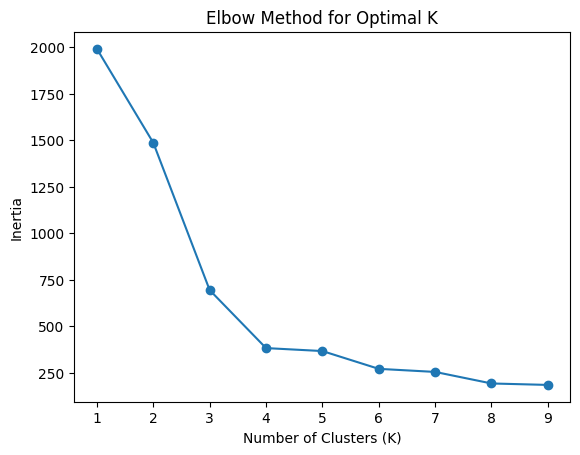

In [10]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
# Based on the curve, we select:

n_clusters = 4

# 7. Apply K-Means Clustering

Each penguin is assigned a cluster label

These clusters represent possible species groups

In [12]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(penguins_preprocessed)

penguins_df['label'] = kmeans.labels_
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,label
0,39.1,18.7,181,3750,0,1,0
1,39.5,17.4,186,3800,1,0,2
2,40.3,18.0,195,3250,1,0,2
3,36.7,19.3,193,3450,1,0,2
4,39.3,20.6,190,3650,0,1,0


# 8. Visualizing the Clusters

We visualize clusters using one important feature: culmen_length_mm.

Each color = one cluster

Different average culmen lengths suggest different species

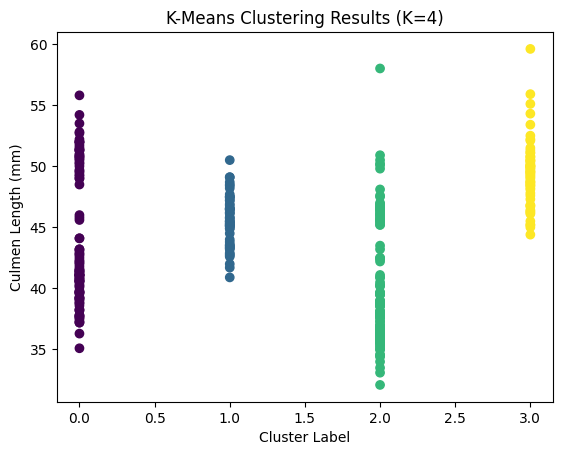

In [13]:
plt.figure()
plt.scatter(
    penguins_df['label'],
    penguins_df['culmen_length_mm'],
    c=kmeans.labels_,
    cmap='viridis'
)
plt.xlabel('Cluster Label')
plt.ylabel('Culmen Length (mm)')
plt.title(f'K-Means Clustering Results (K={n_clusters})')
plt.show()

# 9. Cluster-wise Statistical Summary

We calculate the mean values of important measurements for each cluster.

Each cluster can now be analyzed as a candidate species

In [14]:
numeric_columns = [
    'culmen_length_mm',
    'culmen_depth_mm',
    'flipper_length_mm',
    'label'
]

stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984


# 10. Final Conclusion

We successfully used K-Means clustering to group penguins without labels

The clusters show clear physical differences

These groups likely represent different penguin species

This approach is useful when labels are missing or unreliable

# 11. Key Takeaways

K-Means is an unsupervised learning technique

Scaling is mandatory

Elbow method helps choose optimal K

Clustering can help discover hidden structure in data